# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
from scipy import stats

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

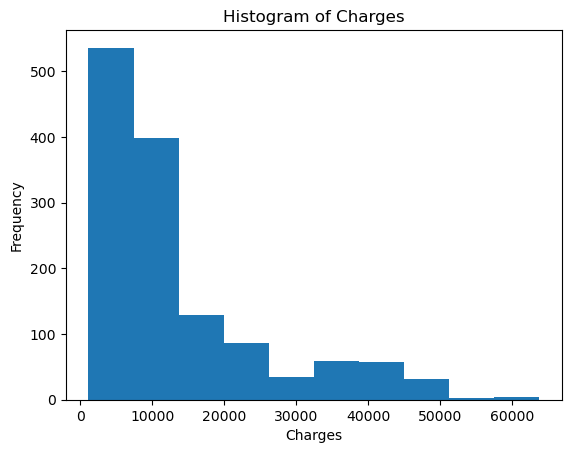

In [5]:
plt.hist(medical['charges'])
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [6]:
charges_mean = medical['charges'].mean()
print("The mean charge is: ", charges_mean)

The mean charge is:  13270.422265141257


In [7]:
charges_std = medical['charges'].std()
print("The charge standard deviation is: ", charges_std)

The charge standard deviation is:  12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

To justify that the data allows us to answer the question of whether the actual average charge has fallen below 12,000, we need to assume that the sample of charges is a random sample and is representative of the population of all hospital charges. Additionally, we also know that the sample size is large enough (often considered as n > 30) so that the Central Limit Theorem applies, and the distribution of sample means is approximately normal.

Given these assumptions, we can apply a one-sample t-test to test the null hypothesis that the true mean charge is equal to 12,000 against the alternative hypothesis that the true mean charge is less than 12,000.

The formula for the t-test statistic is:

t = (x̄ - μ) / (s / sqrt(n))

Where x̄ is the sample mean, μ is the hypothesized population mean (12,000 in this case), s is the sample standard deviation, and n is the sample size.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The adiminstrator should not be concerned as the confidence interval predicts that in 95% of the cases the average charge will be above $12,000.

**Note:**

A one-sided hypothesis test (**one_tailed**) is used when a null hypothesis specifies that, say, the effect of a medical treatment is negative. This would only be rejected by large positive values of a test statistic representing an estimated treatment effect. A two-sided test (**two_tailed**) would be appropriate for a null hypothesis that a treatment effect, say, is exactly
      
zero, and so both positive and negative estimates would lead to the null being rejected.

In [8]:
# Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
n = medical['charges'].count()
t_value = t.ppf(0.95, n-1)
print(t_value)

1.6459941145571317


In [9]:
# Calculate the confidence interval using t-distribution
margin_of_error = t_value * (charges_std/np.sqrt(n))
print(margin_of_error)

544.9350813250251


In [10]:
confidence_interval = (charges_mean - margin_of_error, charges_mean + margin_of_error)
print("We can be 95% confident that the true population mean charge falls within this range: ", confidence_interval)

We can be 95% confident that the true population mean charge falls within this range:  (12725.48718381623, 13815.357346466282)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Knowing that the larger the t-value, the stronger the evidence against the null hypothesis of no difference between the sample mean and the hypothesized population mean. Therefore, the null hypothesis is there is no change in the amount charged regardless of whether patients have insurance or not.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
# We are using the groupby() method of a pandas DataFrame medical to group the data by the values in the insuranceclaim column. 
# We are then selecting the charges column from each group and counting the number of observations in each group using the count() method.
count = medical.groupby(by='insuranceclaim')['charges'].count()
print(count)

# We are using the groupby() method of a pandas DataFrame medical to group the data by the values in the insuranceclaim column. 
# We are then selecting the charges column from each group and calculating the standard deviation of the charges in each group using the std() method.
std_by_insurance = medical.groupby(by='insuranceclaim')['charges'].std()
print(std_by_insurance)

insuranceclaim
0    555
1    783
Name: charges, dtype: int64
insuranceclaim
0     6446.510127
1    14045.928419
Name: charges, dtype: float64


**For Reference:**

Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

In [12]:
n_0 = count[0]
n_1 = count[1]
s_0 = std_by_insurance[0]
s_1 = std_by_insurance[1]
s_p = np.sqrt(((n_0 -1) * s_0 **2 + (n_1 - 1) * s_1 ** 2)/(n_0 + n_1 - 2))
print(s_p)

11520.034268775256


**For Reference:**
the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

In [13]:
mean_by_insurance = medical.groupby(by='insuranceclaim')['charges'].mean()
print(mean_by_insurance)

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64


In [14]:
x_0 = mean_by_insurance[0]
x_1 = mean_by_insurance[1]
t = (x_0 - x_1)/( s_p * np.sqrt((1/n_0) + (1/n_1)))
print(t)

-11.893299030876715


**For Reference**

The **ttest_ind_from_stats() function** from the **scipy.stats module** to perform a two-sample t-test with independent samples. The function takes the following arguments:

**x_0:** the sample mean of the first sample

**s_0:** the sample standard deviation of the first sample

**n_0:** the sample size of the first sample

**x_1:** the sample mean of the second sample

**s_1:** the sample standard deviation of the second sample

**n_1:** the sample size of the second sample

The function returns two values:

**t:** the calculated t-statistic

**p:** the corresponding p-value

**The two-sample t-test is used to determine whether there is a significant difference between the means of two independent groups.** In this case, we are comparing two samples with sample means *x_0 = mean_by_insurance[0]* and *x_1 = mean_by_insurance[1]*, sample standard deviations *s_0 = std_by_insurance[0]* and *s_1 = std_by_insurance[1]8.

The **_ttest_ind_from_stats() function calculates the t-statistic and the corresponding p-value, which can be used to test whether the difference between the means of the two samples is statistically significant. If the p-value is less than the chosen significance level (usually 0.05), we reject the null hypothesis that the two means are equal and conclude that there is a statistically significant difference between the means._** 

In [15]:
t, p = stats.ttest_ind_from_stats(x_0, s_0, n_0, x_1, s_1, n_1)
print(t, p)

-11.893299030876719 4.4612302316203985e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The main difference between z-scores and t-statistics is that z-scores are used to standardize normally distributed data with a known population standard deviation, whereas t-statistics are used to test hypotheses about unknown population means based on sample data.

A z-score measures the number of standard deviations that a data point is away from the mean of a population with a known standard deviation. It is calculated as (x - mu) / sigma, where x is the data point, mu is the population mean, and sigma is the population standard deviation. Z-scores are used to compare observations from different normal distributions or to find the probability of a value occurring within a certain range.

On the other hand, a t-statistic is used when the population standard deviation is unknown and has to be estimated from the sample data. It is used to test the hypothesis that the means of two populations are equal or to determine if a sample mean is significantly different from a population mean. The t-statistic is calculated as (x - mu) / (s / sqrt(n)), where x is the sample mean, mu is the population mean, s is the sample standard deviation, and n is the sample size. The t-distribution has a wider spread than the standard normal distribution, which accounts for the added uncertainty from estimating the population standard deviation from the sample data.

In summary, z-scores are used for standardizing normal distributions with known population parameters, while t-statistics are used for testing hypotheses about population means based on sample data with an unknown population standard deviation. In this case we cannot calculate z-scores from a sample.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test